In [1]:
import cv2
import matplotlib.pyplot

In [2]:
original_img = cv2.imread('sample-photo.jpg')
mask_img = cv2.imread('mask.png', cv2.IMREAD_UNCHANGED)

In [3]:
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
original_img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
faces = cascade.detectMultiScale(original_img_gray, scaleFactor=1.5)

In [4]:
for (f_x, f_y, f_w, f_h) in faces:
    cv2.rectangle(original_img, (f_x, f_y), (f_x + f_w , f_y + f_h), (0, 0, 255), thickness=2)
    m_x = f_x
    m_w = f_w
    m_h = int(f_h * 0.55)
    m_y = f_y + f_h - m_h
    mask_scaled_img = cv2.resize(mask_img, (m_w, m_h))
    mask_alpha_img = mask_scaled_img[:, :, 3:] / 255
    original_img[m_y:m_y + m_h , m_x:m_x + m_w] = original_img[m_y:m_y + m_h, m_x:m_x + m_w] * (1 - mask_alpha_img) + mask_scaled_img[:, :, :3] * mask_alpha_img

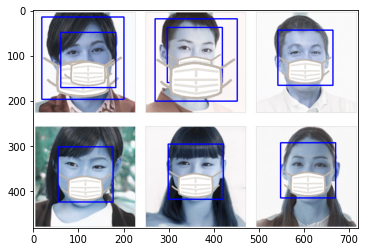

In [5]:
matplotlib.pyplot.imshow(original_img)